Trained weights:  [ 2.12924927e+02 -2.02819986e+02 -1.59806197e+02  6.72384891e-02]


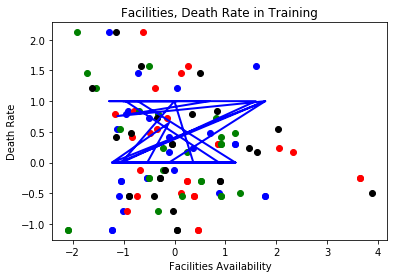

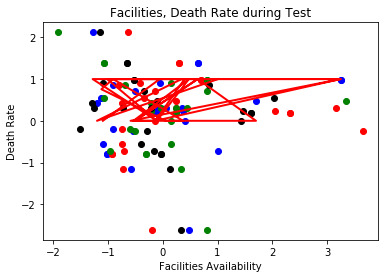

In [21]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

hc_raw = pd.read_csv("HealthInCities.csv")
for clmn in hc_raw:
    col_mean = np.mean(hc_raw[clmn])
    col_stdev = np.std(hc_raw[clmn])
    hc_raw[clmn] = (hc_raw[clmn] - col_mean)/col_stdev
    
hc_raw["norm_ones"] = 0
p = 1 #Training Rate
predX = []
trng_data = hc_raw.sample(frac=0.5, replace=True)
test_data = hc_raw.sample(frac=0.5, replace=True)

Y_train = trng_data.iloc[:, 0].values
X_train = trng_data[['DoctorAvailability', 'HospitalAvailability',
       'IncomePerCapita', 'PopulationDensity']].values

Y_test = test_data.iloc[:, 0].values
X_test = test_data[['DoctorAvailability', 'HospitalAvailability',
       'IncomePerCapita', 'PopulationDensity']].values

def chkWeights(x_i, y_i, w):
   ypred = predict(x_i, w)   # The predicted target
   error = y_i - ypred       
   return w + p * (y_i - ypred) * x_i  # Update the weights

def predict(x_i, w):
   return 1/(1+np.exp(-1 * np.dot(w.T, x_i)))

def SGD(X,y):
    w = np.array([random.random() for x in range(X.shape[1])])
    w_temp = w
    epoch = 0
    while epoch <= 1000:
        for i, x_i in enumerate(X):
            w = chkWeights(x_i, y[i], w)
        pred = 1/(1+np.exp(-1 * np.dot(X, w)))
        error = np.sum(pred - y[i])
        #print(error)
        epoch += 1
        if np.sum(np.abs(w_temp - w)) < 0.001:
            print('Epoch : ', epoch)
            print('Error : ', error)
            return w
        else: 
            w_temp = w
    return w

w = SGD(X_train,Y_train)
print('Trained weights: ', w)
predT = []
for i, x in enumerate(X_test):
    predT.append(1/(1+np.exp(-1 * np.dot(x, w))))
    error = np.sum(predT - Y_test[i])
    #print(x, predT)
train_pred = []
for x in X_train:
    train_pred.append(1/(1+np.exp(-1 * np.dot(x, w))))
#test_prediction = [sum(X_test[i,0] * w[0]) for i in range(X_test.shape[0])]
plt.plot(trng_data['DoctorAvailability'], Y_train, 'bo')
plt.plot(trng_data['HospitalAvailability'], Y_train, 'ro')
plt.plot(trng_data['IncomePerCapita'], Y_train, 'go')
plt.plot(trng_data['PopulationDensity'], Y_train, 'ko')
plt.plot(trng_data['DoctorAvailability'], train_pred, linewidth=2, color='blue')
plt.title("Facilities, Death Rate in Training")
plt.xlabel("Facilities Availability")
plt.ylabel("Death Rate")
plt.show() 

plt.plot(test_data['DoctorAvailability'], Y_test, 'bo')
plt.plot(test_data['HospitalAvailability'], Y_test, 'ro')
plt.plot(test_data['IncomePerCapita'], Y_test, 'go')
plt.plot(test_data['PopulationDensity'], Y_test, 'ko')
plt.plot(test_data['DoctorAvailability'], predT, linewidth=2, color='red')
plt.title("Facilities, Death Rate during Test")
plt.xlabel("Facilities Availability")
plt.ylabel("Death Rate")
plt.show() 